<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project5/blob/main/Seasonality_20_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from pylab import rcParams

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/LuisaPolicarpo/Project5/main/df_final_2017_2022.csv')
df = df.sort_values(by='Date')
df = df.set_index('Date')

,sleeps
Date,
2017-01-01,2657847
2017-02-01,3081026
2017-03-01,4015775
2017-04-01,5706131
2017-05-01,6002029
...,...
2022-07-01,8623586
2022-08-01,9935751
2022-09-01,7664771


In [25]:
df_sleeps = pd.DataFrame(df['sleeps'])
df_sleeps = df_sleeps.iloc[36::]
df_sleeps

,sleeps
Date,
2020-01-01,3258226
2020-02-01,3817043
2020-03-01,1875506
2020-04-01,133212
2020-05-01,261593
2020-06-01,1031062
2020-07-01,2631261
2020-08-01,5082349
2020-09-01,3534350


In [26]:
test_size_percentage = 0.25
test_size = int(test_size_percentage * df_sleeps.shape[0])
train_size_initial = df_sleeps.shape[0] - test_size

train_set = df_sleeps['sleeps'].iloc[:train_size_initial]
test_set = df_sleeps['sleeps'].iloc[train_size_initial:]


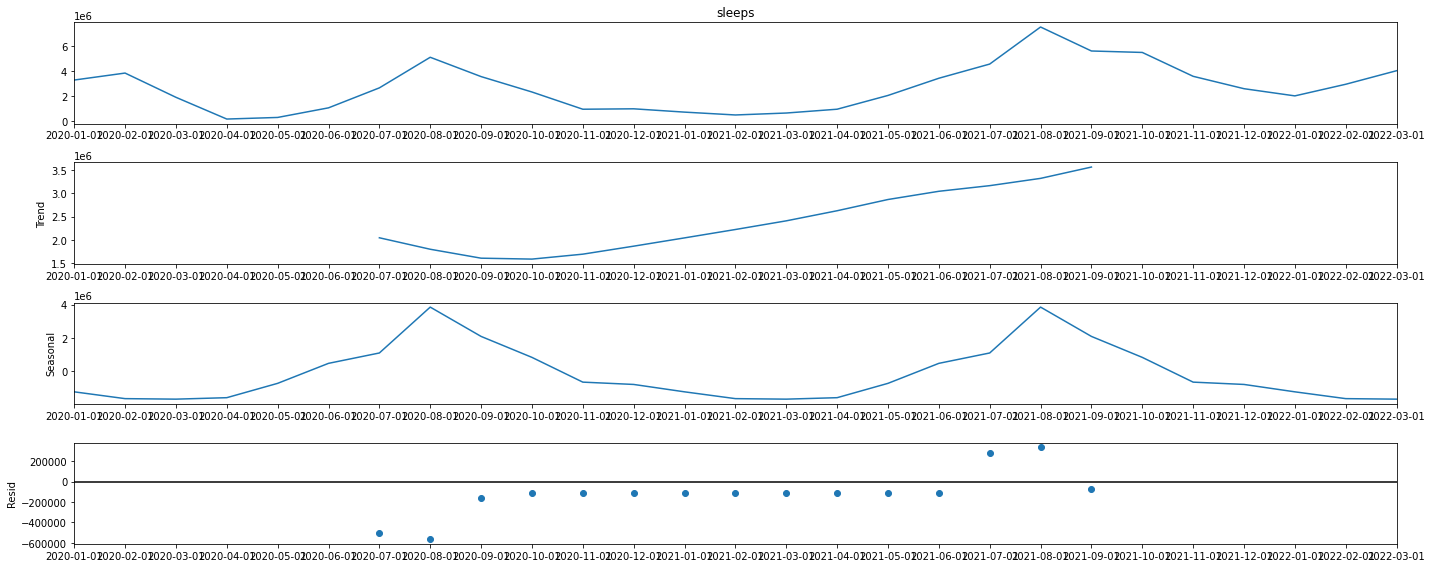

In [27]:
rcParams['figure.figsize'] = 20, 8
decomposition = sm.tsa.seasonal_decompose(x = train_set, period = 12, model='additive')
#decomposition = sm.tsa.seasonal_decompose(x = train_set.rolling(12).mean().dropna(), period = 12, model='additive')
#decomposition2 = sm.tsa.seasonal_decompose(x = (train_set - decomposition.seasonal).dropna(), period = 18, model='additive')
fig = decomposition.plot()
plt.show()

In [28]:
from statsmodels.tsa.stattools import kpss
alpha = 0.05
kpss(train_set, regression='c', nlags = 'auto') 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.217795382700401,
 0.1,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

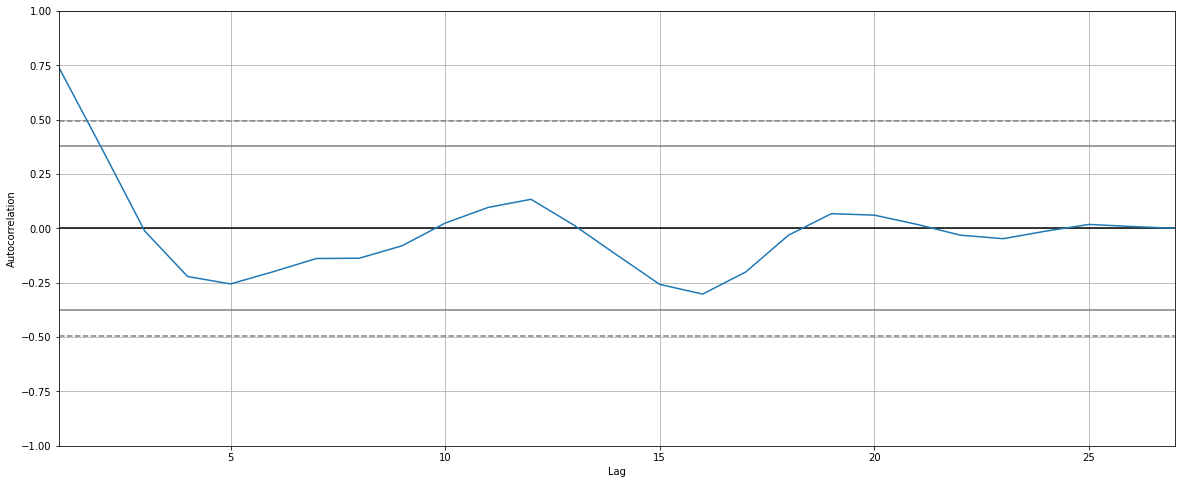

In [29]:
autocorrelation_plot(train_set)
plt.show()

In [11]:
train_set.autocorr(12)

0.5222544802776541

In [12]:
decomposition.seasonal

Date
2020-02-01   -1.680127e+06
2020-03-01   -1.710807e+06
2020-04-01   -1.623001e+06
2020-05-01   -7.617106e+05
2020-06-01    4.388758e+05
2020-07-01    1.454393e+06
2020-08-01    3.816918e+06
2020-09-01    2.056317e+06
2020-10-01    7.974845e+05
2020-11-01   -6.889826e+05
2020-12-01   -8.278814e+05
2021-01-01   -1.271479e+06
2021-02-01   -1.680127e+06
2021-03-01   -1.710807e+06
2021-04-01   -1.623001e+06
2021-05-01   -7.617106e+05
2021-06-01    4.388758e+05
2021-07-01    1.454393e+06
2021-08-01    3.816918e+06
2021-09-01    2.056317e+06
2021-10-01    7.974845e+05
2021-11-01   -6.889826e+05
2021-12-01   -8.278814e+05
2022-01-01   -1.271479e+06
2022-02-01   -1.680127e+06
2022-03-01   -1.710807e+06
Name: seasonal, dtype: float64

In [30]:
train_set_seas = pd.DataFrame(decomposition.seasonal)
train_set_seas

,seasonal
Date,
2020-01-01,-1.238774e+06
2020-02-01,-1.647422e+06
2020-03-01,-1.678103e+06
2020-04-01,-1.590296e+06
2020-05-01,-7.290059e+05
2020-06-01,4.715805e+05
2020-07-01,1.094641e+06
2020-08-01,3.849623e+06
2020-09-01,2.089022e+06


In [31]:
df_sleeps12 = train_set_seas.iloc[:12:]
df_sleeps12 = df_sleeps12.reset_index().rename(columns={'seasonal':'season_2020'})
df_sleeps12

,Date,season_2020
0,2020-01-01,-1.238774e+06
1,2020-02-01,-1.647422e+06
2,2020-03-01,-1.678103e+06
3,2020-04-01,-1.590296e+06
4,2020-05-01,-7.290059e+05
5,2020-06-01,4.715805e+05
6,2020-07-01,1.094641e+06
7,2020-08-01,3.849623e+06
8,2020-09-01,2.089022e+06
9,2020-10-01,8.301892e+05


In [35]:
df_sleeps24 = train_set_seas.iloc[12:24:]
df_sleeps24 = df_sleeps24.reset_index().rename(columns={'seasonal':'season_2021'})
df_sleeps24

,Date,season_2021
0,2021-01-01,-1.238774e+06
1,2021-02-01,-1.647422e+06
2,2021-03-01,-1.678103e+06
3,2021-04-01,-1.590296e+06
4,2021-05-01,-7.290059e+05
5,2021-06-01,4.715805e+05
6,2021-07-01,1.094641e+06
7,2021-08-01,3.849623e+06
8,2021-09-01,2.089022e+06
9,2021-10-01,8.301892e+05


In [22]:
#df_sleeps36 = train_set_seas.iloc[23:37:]
#df_sleeps36 = df_sleeps36.reset_index().rename(columns={'seasonal':'season_2021'})
#df_sleeps36

In [ ]:
#df_sleeps48 = df_sleeps.iloc[36:48:]
#df_sleeps48 = df_sleeps48.reset_index().rename(columns={'sleeps':'sleeps4'})
#df_sleeps48

In [36]:
season = pd.concat([df_sleeps12, df_sleeps24], axis=1)
season.drop(['Date'], axis = 1, inplace = True) 

In [37]:
season

,season_2020,season_2021
0,-1.238774e+06,-1.238774e+06
1,-1.647422e+06,-1.647422e+06
2,-1.678103e+06,-1.678103e+06
3,-1.590296e+06,-1.590296e+06
4,-7.290059e+05,-7.290059e+05
5,4.715805e+05,4.715805e+05
6,1.094641e+06,1.094641e+06
7,3.849623e+06,3.849623e+06
8,2.089022e+06,2.089022e+06
9,8.301892e+05,8.301892e+05


In [39]:
season['average'] = season[['season_2020','season_2021']].mean(axis=1)
season
df_months = pd.DataFrame({'months': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})
df_season = pd.concat([df_months, season], axis=1)
df_season =df_season[['months','average']]
df_season = df_season.rename(columns={'average':'seasonality_avg'})
df_season

,months,seasonality_avg
0,1,-1.238774e+06
1,2,-1.647422e+06
2,3,-1.678103e+06
3,4,-1.590296e+06
4,5,-7.290059e+05
5,6,4.715805e+05
6,7,1.094641e+06
7,8,3.849623e+06
8,9,2.089022e+06
9,10,8.301892e+05


In [40]:
df_season.to_csv('seasonality_20_22.csv')

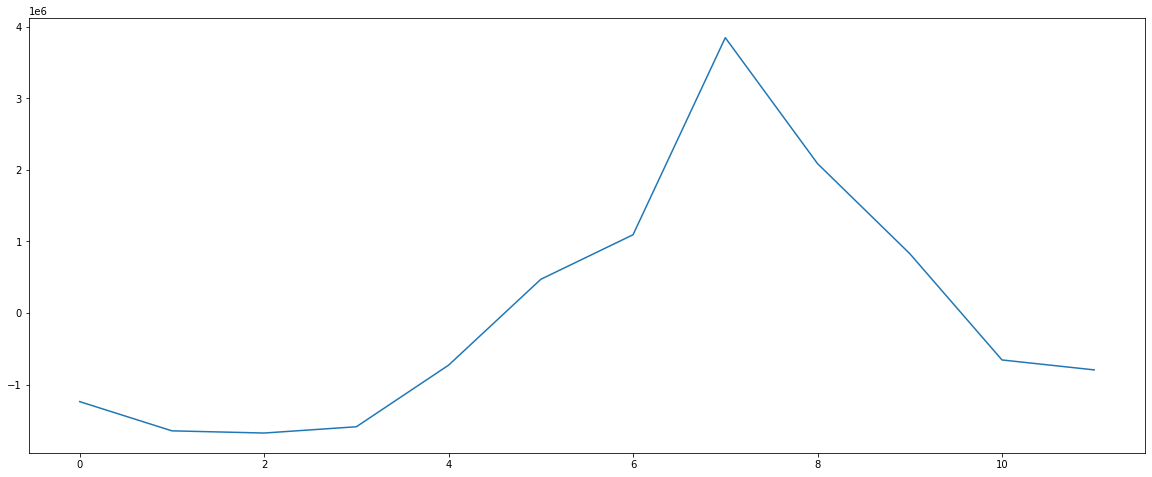

In [41]:
plt.plot(df_season['seasonality_avg'])

In [ ]:
decomposition.resid

Date
2017-01-01             NaN
2017-02-01             NaN
2017-03-01             NaN
2017-04-01             NaN
2017-05-01             NaN
2017-06-01             NaN
2017-07-01    16495.343750
2017-08-01   -57081.260417
2017-09-01   -10894.072917
2017-10-01    -5115.677083
2017-11-01    -5115.677083
2017-12-01    -5115.677083
2018-01-01    -5115.677083
2018-02-01    -5115.677083
2018-03-01    -5115.677083
2018-04-01    -5115.677083
2018-05-01    -5115.677083
2018-06-01    -5115.677083
2018-07-01   -26726.697917
2018-08-01    46849.906250
2018-09-01      662.718750
2018-10-01             NaN
2018-11-01             NaN
2018-12-01             NaN
2019-01-01             NaN
2019-02-01             NaN
2019-03-01             NaN
Name: resid, dtype: float64